In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# Once imported, you will use the .load_data() method to download the data, 
# it will download and store the data in your Keras directory.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 7s 0us/step


In [10]:
# print the shape of training and testing images shape
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [11]:
# print the shape of the labels
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [12]:
# find out the total number of labels and the various kinds of classes the data has.
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [15]:
# create a dictionary that will have class names with their corresponding categorical class labels.
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


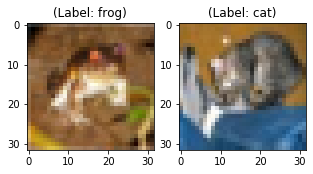

In [16]:
# plot the CIFAR-10 images
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [17]:
# Check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.
np.min(x_train),np.max(x_train)

(0, 255)

In [20]:
# Normalize the x_train data to between 0 and 1
x_train = x_train/255.0

In [21]:
# Verify the data has been transformed
np.min(x_train),np.max(x_train)

(0.0, 0.00392156862745098)

In [23]:
# Verify the shape of the data
x_train.shape

(50000, 32, 32, 3)

In [29]:
# Create a DataFrame that will hold the pixel values of the images 
# along with their respective labels in a row-column format.
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print(f'Size of the dataframe: {df_cifar.shape}')

Size of the dataframe: (50000, 3073)


Perfect! The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.

In [31]:
# Review the dataframe
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,...,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,6
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,...,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,9
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,9
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,...,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,4
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,...,0.001153,0.001215,0.001261,0.001092,0.001153,0.001200,0.001123,0.001184,0.001230,1


In [36]:
# Create the PCA method and pass the number of components as two and apply fit_transform on the training data
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [37]:
# Convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame.
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-0.025102,0.010702,6
1,0.003254,-0.003725,9
2,0.030315,-0.045185,9
3,-0.040580,0.000042,4
4,-0.010297,-0.019487,1


In [39]:
# Find out the amount of information or variance the principal components hold.
print(f'Explained variation per principal component: {pca_cifar.explained_variance_ratio_}')

Explained variation per principal component: [0.2907663  0.11253144]


Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

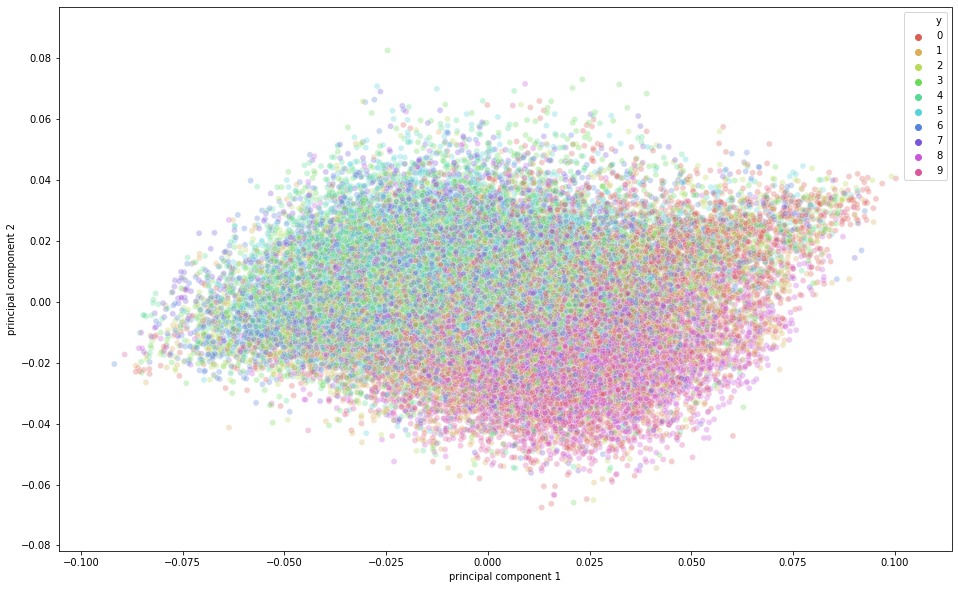

In [42]:
# Visualize the CIFAR-10 data in a two-dimensional space.
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

# Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset

In [43]:
# Normalize the training and testing images.
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
# reshape the test data
x_test_flat = x_test.reshape(-1,3072)

 Here, you can also pass how much variance you want PCA to capture.
 Let's pass 0.9 as a parameter to the PCA model, which means that PCA
 will hold 90% of the variance and the number of components required to capture 90% variance will be used.
Note that earlier you passed n_components as a parameter and you could then find out how much variance was captured by those two components. But here we explicitly mention how much variance we would like PCA to capture and hence, the n_components will vary based on the variance parameter.

If you do not pass any variance, then the number of components will be equal to the original dimension of the data.

In [44]:
pca = PCA(0.9)

In [45]:
# Fit the PCA instance on the training images.
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
# Find out how many n_components PCA used to capture 0.9 variance.
pca.n_components_

99

From the above output, you can observe that to achieve 90% variance, the dimension was reduced to 99 principal components from the actual 3072 dimensions.

In [47]:
# Apply transform on both the training and test set to generate a transformed dataset
# from the parameters generated from the fit method.
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [49]:
# Convert your training and testing labels to one-hot encoding vector.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [50]:
# Define the number of epochs, number of classes, and the batch size for your model.
batch_size = 128
num_classes = 10
epochs = 20

In [51]:
# define your Sequential model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
# print the model summary.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              102400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 12s 230us/step - loss: 1.8999 - acc: 0.2996 - val_loss: 12.1091 - val_acc: 0.2402
Epoch 2/20
50000/50000 [==============================] - 12s 236us/step - loss: 1.6456 - acc: 0.4045 - val_loss: 11.1401 - val_acc: 0.3000
Epoch 3/20
50000/50000 [==============================] - 13s 254us/step - loss: 1.5189 - acc: 0.4541 - val_loss: 11.0428 - val_acc: 0.3073
Epoch 4/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.4283 - acc: 0.4887 - val_loss: 11.2966 - val_acc: 0.2914
Epoch 5/20
50000/50000 [==============================] - 11s 227us/step - loss: 1.3604 - acc: 0.5113 - val_loss: 11.3622 - val_acc: 0.2863
Epoch 6/20
50000/50000 [==============================] - 11s 215us/step - loss: 1.3002 - acc: 0.5332 - val_loss: 11.7343 - val_acc: 0.2652
Epoch 

From the above output, you can observe that the time taken for training each epoch was just 8-12 seconds on a CPU. The model did a decent job on the training data, achieving ~70% accuracy while it achieved only 56% accuracy on the test dat. This means that it overfitted the training data. However, remember that the data was projected to 99 dimensions from 3072 dimensions and despite that it did a great job!

In [54]:
#Finally, let's see how much time the model takes to train on the original dataset
# and how much accuracy it can achieve using the same deep learning model.
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 462us/step - loss: 2.0678 - acc: 0.2174 - val_loss: 13.7206 - val_acc: 0.1431
Epoch 2/20
50000/50000 [==============================] - 19s 387us/step - loss: 1.8693 - acc: 0.3178 - val_loss: 12.2728 - val_acc: 0.2303
Epoch 3/20
50000/50000 [==============================] - 20s 391us/step - loss: 1.7767 - acc: 0.3539 - val_loss: 13.0486 - val_acc: 0.1855
Epoch 4/20
50000/50000 [==============================] - 19s 381us/step - loss: 1.7083 - acc: 0.3813 - val_loss: 12.1412 - val_acc: 0.2402
Epoch 5/20
50000/50000 [==============================] - 20s 399us/step - loss: 1.6544 - acc: 0.4042 - val_loss: 12.0005 - val_acc: 0.2490
Epoch 6/20
50000/50000 [==============================] - 24s 473us/step - loss: 1.6022 - acc: 0.4203 - val_loss: 12.1864 - val_acc: 0.2374
Epoch 7/20
50000/50000 [==============================] - 24s 486us/step - loss: 1.5540 - acc: 0.4399 - val_lo

Voila! From the above output, it is quite evident that the time taken for training each epoch was around 23 seconds on a CPU which was almost three times more than the model trained on the PCA output.

Moreover, both the training and testing accuracy is less than the accuracy you achieved with the 99 principal components as an input to the model.

So, by applying PCA on the training data you were able to train your deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data.